# Exercise session 5: Models of the visual system

During the lecture we studied how the responses of single neurons can inform us about the way the visual system works. In this exercise session, we will apply a similar approach to models of the visual system, to try to answer the question: <b>What is a good model of the brain's visual system?</b>

Throughout this notebook, you will find out at the beginning of each cell whether you need to adjust a parameter or just run the cell as it is.

Run the next cell to import the necessary code:

In [1]:
# Run without changing

!mkdir utils_ex5
!wget -P utils_ex5/ https://github.com/ManteLab/Iton_notebooks_public/raw/refs/heads/main/utils_ex5/vgg_utils.py
!wget -P utils_ex5/ https://github.com/ManteLab/Iton_notebooks_public/raw/refs/heads/main/utils_ex5/rao_ballard_trained.pkl

from utils_ex5.vgg_utils import *

# Import packages
import torch #machine learning package

import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider, FloatSlider
import ipywidgets as widgets

import warnings
warnings.filterwarnings("ignore")

# Table of contents:

* [Part I: Convolution neural networks as a model of the visual system](#cnns)
    * [1: Receptive Fields of CNNs](#rfs_cnns)
    * [2: Stimuli: Sinusoidal gratings](#gratings)
    * [3: Presenting stimuli to CNNs](#stimuli_cnns)
    * [4: Contrast saturation](#contrast_cnns)
    * [5: Cross-orientation suppression](#inhibtion_cnns)
    * [6: Contrast saturation for optimal vs. sup-optimal orientation](#contrast_cnns_2)
    

* [Part II: Rao and Ballard model of predictive coding in V1](#rao_ballard)
    * [1: Contrast saturation](#contrast_rao)
    * [2: Cross-orientation suppression](#inhibtion_rao)
    * [3: End-inhibiton](#end_inh_rao)


## Part I. Convolutional neural networks <a class="anchor" id="cnns"></a>

Convolutional neural networks (CNNs) are artificial neural network models that classify images by detecting what objects are inside the image. CNNs work by applying many "layers" of operations to the image to extract important information (below: feature learning) where "neurons" are the nodes in each layer. In a way, this is somewhat similar to the way the brain works by first computing simple properties of the world in primary visual cortex, and then building to complex representations in higher visual cortex. CNNs also work remarkably well as image classifiers, no other models come as close in accuracy to humans, so maybe they are a good model of the brain. In this exercise session we will try to find out.  

![](https://raw.githubusercontent.com/ManteLab/Iton_notebooks_public/refs/heads/main/images/cnn_architecture.png "Convolutional neural networks")

**Assignment 1** Assuming that CNNs are a good model of the brain, what sort of "neurons" would we find in the first layers of the CNN?

<details>
<Summary>Answer</Summary>

The first layers of the CNN we might find neurons similar to those of cells with center-surround cells like in the Thalamus (LGN). Alternatively, we might find "neurons" that respond to simple features like orientations and contrast like in V1.

</details>

Now, let's load a convolutional neural network (we are using a network called Alexnet, more info: [here](https://pytorch.org/hub/pytorch_vision_alexnet/))

In [36]:
# Run without changing

convolutional_neural_net = load_cnn_model()
layers = get_network_layers(convolutional_neural_net)

print('Below we display the architecture:')
print(convolutional_neural_net)

print('Our goal is to study how the layers of the feature learning part, i.e. (0) to (12), transform the input image.')


Using cache found in /Users/ioanacalangiu/.cache/torch/hub/pytorch_vision_v0.10.0


Below we display the architecture:
AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=92

## 1. Receptive Fields of the *convolutional layers*<a class="anchor" id="rfs_cnns"></a>

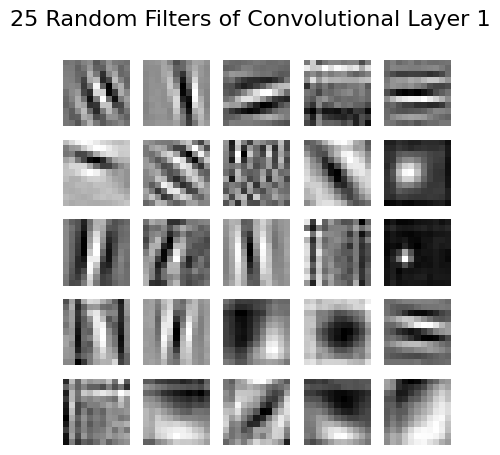

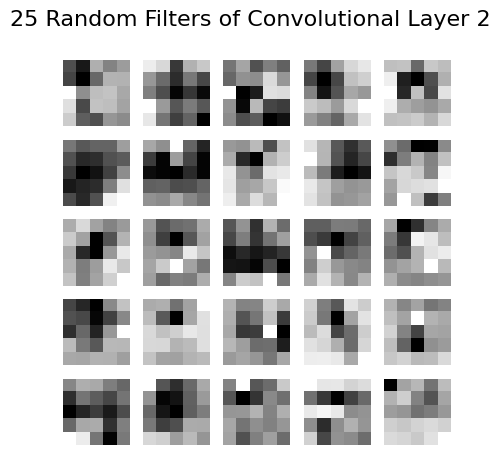

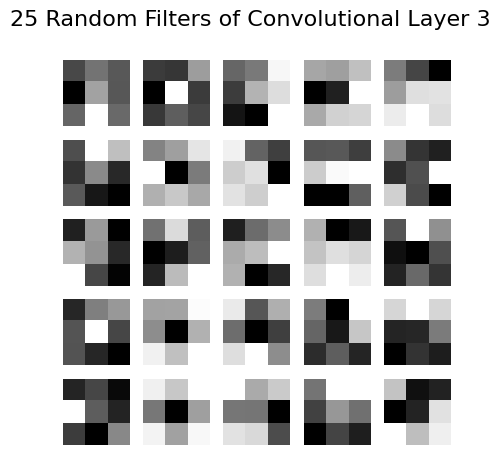

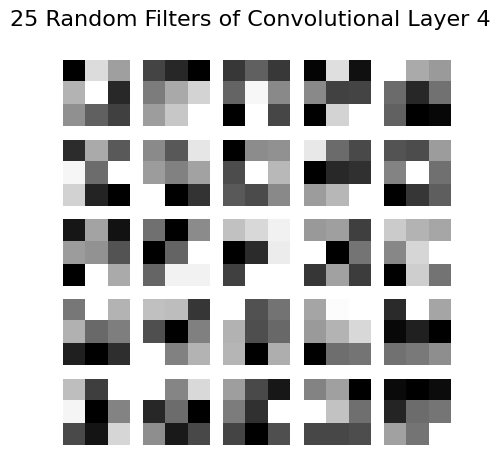

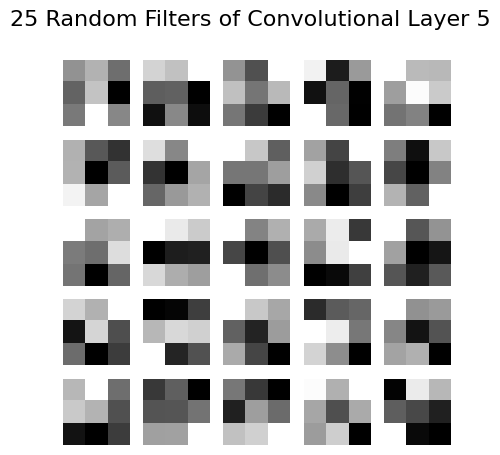

In [37]:
# Run without changing

plot_alexnet_rfs(convolutional_neural_net)

**Assignment 2** What happens with the filters when you go into deeper layers?

<details>
<Summary>Answer</Summary>

When you go into deeper layers in a neural network, the filters perform more abstract and high-level transformations on the input data.

</details>

## 2. Stimuli: sinusoidal gratings <a class="anchor" id="gratings"></a>

In this exercise session you will act like a neuroscientist investigating a real brain. You'll start simple: by investigating the network's response to very simple stimuli: the gratings seen in the lecture. Run the next piece of code to explore the parameters of the gratings.

In [38]:
# Run without changing

interact(interactive_grating, 
    frequency=FloatSlider(min=2, max=20, step=0.5, value=10, description="Frequency (Hz)",continuous_update=False),
    radius=IntSlider(min=1, max=100, step=10, value=12, description="Radius", continuous_update=False),
    contrast=FloatSlider(min=0.1, max=1., step=0.05, value=1, description="Contrast", continuous_update=False),
    orientation=IntSlider(min=0, max=180, step=12, value=90, description="Orientation", continuous_update=False),
    );

interactive(children=(FloatSlider(value=10.0, continuous_update=False, description='Frequency (Hz)', max=20.0,…

In the following sections we will perform a series of experiments on the CNN "neurons" to quantify their similarity to properties of real neurons in the visual system.

## 3. Presenting stimuli to CNNs <a class="anchor" id="stimuli_cnns"></a>

Just like the lecture, we will present different grating stimuli to the different "neurons" of the network. We will start by presenting gratings with different levels of contrast.

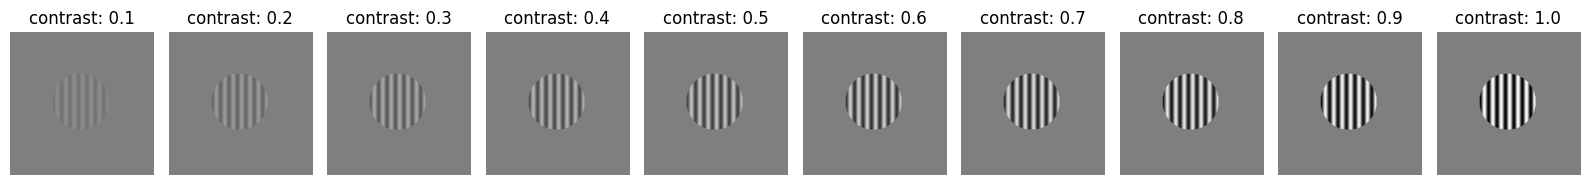

In [39]:
# Run without changing

# Set parameters
size = (256, 256)
center_x = 125
center_y = 125 
frequency = 15
orientation = 90
radius = 50


#generate different gratings with increasing contrasts
contrasts = np.linspace(0.1, 1, 10)
gratings = create_contrast_gratings(frequency, radius, contrasts, orientation)

plot_image_row(gratings, titles=[f'contrast: {c:.2}' for c in contrasts])


Next: we'll pass the gratings through the convolutional neural network.
 
We will investigate what types of computations are performed at the different layers. For this, we choose the number of layers we want to keep by setting the variable NUM_LAYERS and run a series of subsequent analyses to see how the output of the network looks like after NUM_LAYERS layers and how the output changes as we change the inputs.

We start with NUM_LAYERS = 1, which is the output of the (1): ReLU(inplace=True).

Run the following cell a few times, changing the parameter NUM_LAYERS, and look at 1) how the dimensionality of variable network_outputs changes and 2) how the network's output, i.e. neuron_response, changes.

The size of the input (gratings variable) is 256 x 256.
We are passing the input through the following layers: 
Sequential(
  (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
  (1): ReLU(inplace=True)
)
The variable network_outputs has dimensionality 10 stimuli x 64 filters x 63 x 63 "neurons"


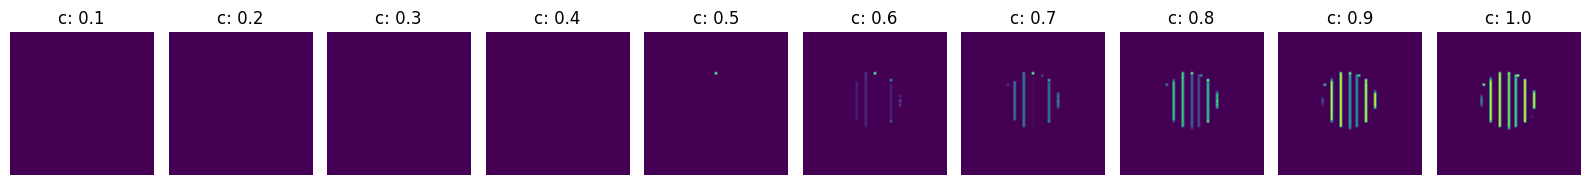

In [44]:
# Here you can change NUM_LAYERS variable to adjust the number of computations

print(f'The size of the input (gratings variable) is {gratings[0].shape[1]} x {gratings[0].shape[2]}.')

#This parameter determines how many layers of computation we are applying to the input image.
NUM_LAYERS = 1 # possible values: 1, 2, 3, 4, 5
FILTER_NUMBER = 0

# You don't need to change anything below here.
network_layers = layers[0:NUM_LAYERS+1]
print('We are passing the input through the following layers: ')
print(network_layers)

#pass the gratings through the layers we selected
network_outputs = network_layers(gratings).detach()

print(f'The variable network_outputs has dimensionality {network_outputs.shape[0]} stimuli x {network_outputs.shape[1]} filters x {network_outputs.shape[2]} x {network_outputs.shape[3]} "neurons"')

neuron_response = network_outputs[:, FILTER_NUMBER]

id_x, id_y = get_center(network_outputs.shape[2], network_outputs.shape[3])

#plot the responses of our neuron in the layer we selected
plot_image_row(neuron_response.unsqueeze(1), titles=[f'c: {c:.2}' for c in contrasts])


**Assignment 3** What happens to the resulted image when you apply more layers of computation? Run the previous cell and change the NUM_LAYERS. What happens before and after MaxPool2d?

<details>
<Summary>Answer</Summary>

The early layers "highlight" basic components of the image without altering the overall structure, while the deeper layers do not "see" the image in the way humans would; instead, they encode the features in a way that makes sense for classification or decision-making purposes. Before MaxPool2d the output is sparse, while after MaxPool2d the output is more dense. Look at Slide 39 of Lecture 5. How does MaxPool2d relate to what a complex cell does?

</details>

## 4. Experiment 1: Contrast saturation <a class="anchor" id="contrast_cnns"></a>

This experiment was mentioned in class in "Non-linear computations in V1", Slide 40 of Lecture 5.


Now we will plot the activity of each neuron as a function of different stimuli contrasts. The orientation of the stimuli is fixed across the different contrasts. Each line illustrates one neuron.

The variable network_outputs has dimensionality 10 stimuli x 64 filters x 63 x 63 "neurons"


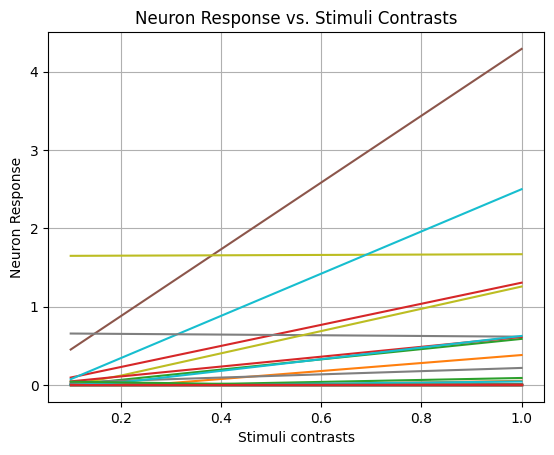

In [45]:
# Run without changing

print(f'The variable network_outputs has dimensionality {network_outputs.shape[0]} stimuli x {network_outputs.shape[1]} filters x {network_outputs.shape[2]} x {network_outputs.shape[3]} "neurons"')

_=plt.plot(contrasts, network_outputs[:, :, id_x, id_y].detach().numpy())

plt.xlabel('Stimuli contrasts')
plt.ylabel('Neuron Response')

# Optionally set a title
plt.title('Neuron Response vs. Stimuli Contrasts')

# Show the plot
plt.grid()
plt.show()


## 5. Experiment 2: Cross-orientation suppression <a class="anchor" id="inhibtion_cnns"></a>

This experiment was mentioned in class in "Non-linear computations in V1", Slide 40 of Lecture 5.

### Find preferred orientation for each neuron

The first step is to identify for each neuron its preferred orientation. We will do this by computing each neuron's response to gratings of different orientations. We consider the orientation that elicits the highest response as being the neuron's preferred orientation.

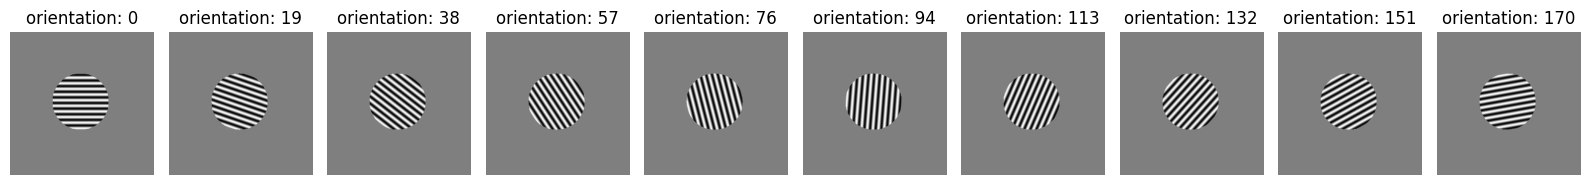

In [23]:
# Run without changing

# Set parameters
size = 256
center = (125, 125)

radius = 50
frequency = 10
contrast = 1

orientations = np.linspace(0, 170, 10)

gratings = create_orientation_gratings(frequency, radius, contrast, orientations, size, center)
plot_image_row(gratings, titles=[f'orientation: {o:.0f}' for o in orientations])

Now we will plot the activity of each neuron as a function of different stimuli orientations. The contrast is now fixed. Each line illustrates one neuron.

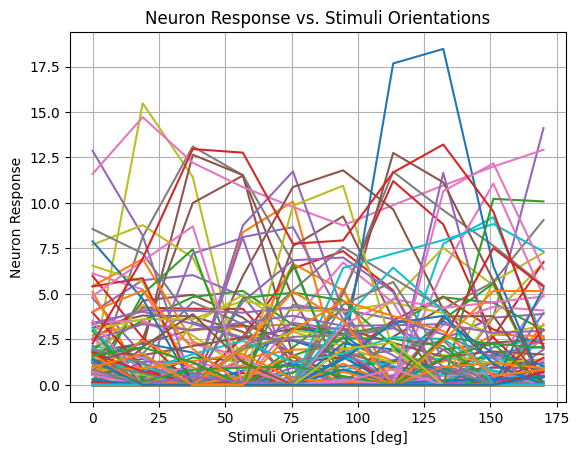

In [24]:
# Run without changing

network_layers = layers[0:NUM_LAYERS+1]
network_outputs = network_layers(gratings)

_=plt.plot(orientations, network_outputs[:, :, id_x, id_y].detach().numpy())

# Set the x-axis and y-axis labels
plt.xlabel('Stimuli Orientations [deg]')
plt.ylabel('Neuron Response')

# Optionally set a title
plt.title('Neuron Response vs. Stimuli Orientations')

# Show the plot
plt.grid()
plt.show()

**Assignment 4** How do we determine a neuron's preferred orientation?

<details>
<Summary>Answer</Summary>

We will determine each neuron's preferred orientation by looking which stimuli orientation elicited the highest response.

</details>



In [25]:
# Run without changing

print(f'The output of the network after passing an input image through {NUM_LAYERS} layers is: {network_outputs.shape[0]} stimuli x {network_outputs.shape[1]} filters x {network_outputs.shape[2]} x {network_outputs.shape[3]} neurons')

m = network_outputs[:, :, id_x, id_y].detach().numpy()

print(f'The tuning curve of each neuron is stored in variable m of dimensionality {m.shape[0]} stimuli x {m.shape[1]} filters')

# We take the maximum across rows, i.e. for each neuron we look which stimuli elicited the highest response
max_indices = np.argmax(m, axis=0) 
neuron_pref_orientation = orientations[max_indices]

print(f'Each neurons preferred orientation is stored in variable neuron_pref_orientation of dimensionality {neuron_pref_orientation.shape[0]}')


The output of the network after passing an input image through 5 layers is: 10 stimuli x 192 filters x 15 x 15 neurons
The tuning curve of each neuron is stored in variable m of dimensionality 10 stimuli x 192 filters
Each neurons preferred orientation is stored in variable neuron_pref_orientation of dimensionality 192


**Assignment 5** Inspecting the figure above: are all neurons behaving similarly?

<details>
<Summary>Answer</Summary>

Different neurons have different preferred orientations, i.e. their highest response is elicited by different stimuli. Moreover, some neurons are tuned to orientation (their activity changes as a function of the orientations), while some neurons are untuned (their activity is invariant to the orientation).

</details>



**Assignment 6** How could we select only the neurons that are tuned?


<details>
<Summary>Answer</Summary>

One possibility is to compute the variance across stimuli orientations. The higher the variance, the better the tuning of the neuron.

</details>



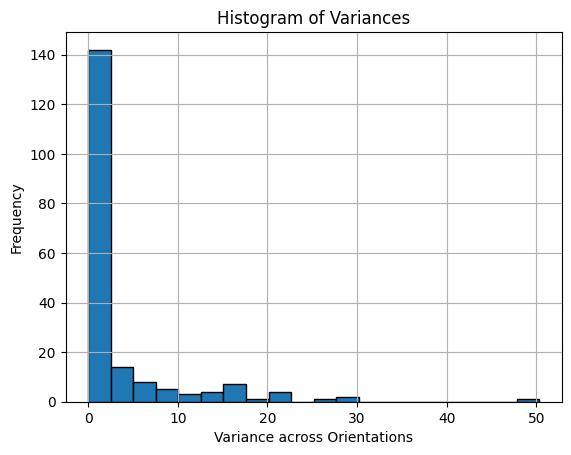

In [26]:
# Run without changing

variances = np.var(m, axis=0)

# Plot the histogram of the variances
plt.hist(variances, bins=20, edgecolor='black')
plt.title('Histogram of Variances')
plt.xlabel('Variance across Orientations')
plt.ylabel('Frequency')
plt.grid()
plt.show()

### Super-imposing two gratings: grating of preferred orientation and grating of orthogonal orientation

For each neuron, we compute its response to its optimal grating superimposed with an orthogonal grating of varying contrasts.

In [27]:
#Here we select an *arbitrary* threshold to focus only on the most tuned units

variance_threshold = np.median(variances)
valid_neurons = variances > variance_threshold 
valid_neuron_indices = np.nonzero(valid_neurons)[0]

print('A list of tuned units: ', valid_neuron_indices)


A list of tuned units:  [  1   3   4   5   8  10  12  13  14  15  19  21  24  25  27  31  34  35
  37  38  39  42  43  45  46  47  50  53  55  56  60  61  62  64  65  66
  68  71  72  73  75  76  77  78  80  83  84  86  88  92  97  99 100 104
 106 107 108 111 113 115 116 122 123 124 125 128 129 130 131 134 137 138
 140 142 144 147 149 152 153 155 156 159 160 162 163 164 165 166 167 170
 171 181 182 183 188 191]


Prefered orientation of neuron 0 is 76 deg and orth orientation is 166 deg.
Orthogonal orientation 166


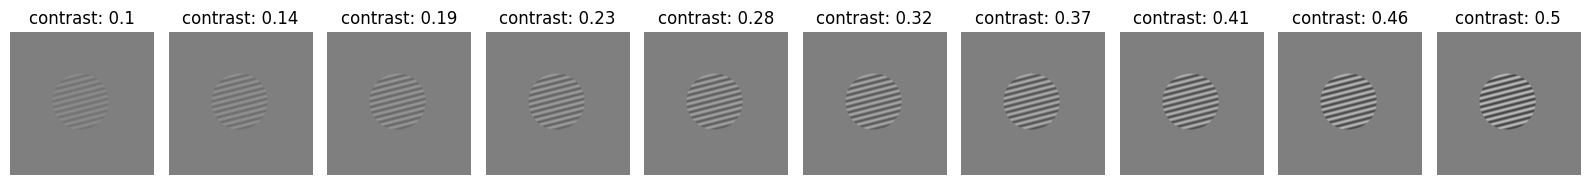

Prefered and orthogonal orientation super-imposed


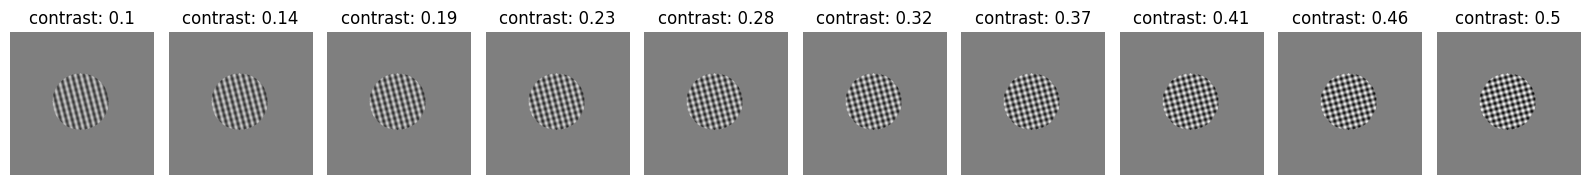

In [28]:
# Run without changing

pref_orientation, orth_orientation = get_pref_and_orth_angle(neuron_pref_orientation[valid_neuron_indices[FILTER_NUMBER]])

print(f'Prefered orientation of neuron {FILTER_NUMBER} is {pref_orientation:.0f} deg and orth orientation is {orth_orientation:.0f} deg.')

# Set parameters
size = 256
center = (125, 125)
radius = 50
frequency = 10
contrast = 0.5

orientations = np.linspace(0, 170, 10)
contrast_pref = np.linspace(0.5, 0.5, 1)
contrasts_orth = np.linspace(0.1, 0.5, 10)

print(f'Orthogonal orientation {orth_orientation:.0f}')
gratings_orthogonal = create_contrast_gratings(frequency, radius, contrasts_orth, orth_orientation)
plot_image_row(gratings_orthogonal, titles=[f'contrast: {c:.2}' for c in contrasts_orth])

print('Prefered and orthogonal orientation super-imposed')
gratings_superimposed = create_superimposed_gratings(frequency, radius, contrast_pref, contrasts_orth, pref_orientation, orth_orientation, size, center)
plot_image_row(gratings_superimposed, titles=[f'contrast: {c:.2}' for c in contrasts_orth])

In [29]:
# Run without changing

# We pass the two types of stimuli (orthogonal and super-imposed through the network)
network_layers = layers[0:NUM_LAYERS+1]
network_outputs_superimposed = network_layers(gratings_superimposed)
network_outputs_orthogonal = network_layers(gratings_orthogonal)

### Response of a neuron to super-imposed gratings (one contrast value for preferred orientation grating)

The response of a neuron when we super-impose a grating of orthogonal direction of varying contrasts onto a grating of its preferred orientation and high contrast.

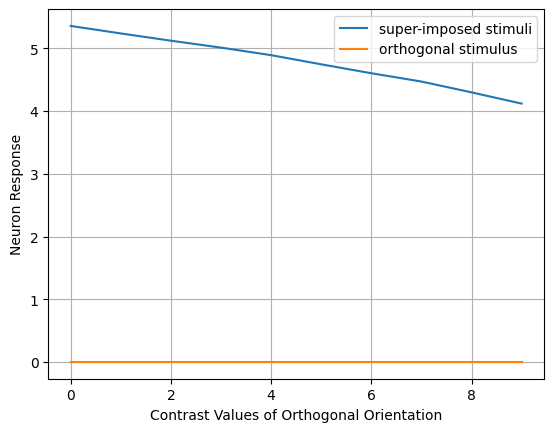

In [30]:
# Run without changing

_=plt.plot(network_outputs_superimposed[:, valid_neuron_indices[FILTER_NUMBER],id_x,id_y].detach().numpy(), label = 'super-imposed stimuli')
_=plt.plot(network_outputs_orthogonal[:, valid_neuron_indices[FILTER_NUMBER],id_x,id_y].detach().numpy(), label = 'orthogonal stimulus')


plt.xlabel('Contrast Values of Orthogonal Orientation')
plt.ylabel('Neuron Response')
plt.legend()
# Show the plot
plt.grid()
plt.show()

**Assignment 7** How does the neuron respond to the orthogonal grating? How does the neuron respond when we super-impose the orthogonal grating onto the preferred grating? How does this compare to the response of a V1 neuron?


<details>
<Summary>Answer</Summary>

The neuron does not respond to an orthogonal grating. However, when the orthogonal grating is super-imposed to the preferred grating, it suppresses the neuron's response to the preferred grating. This effect was mentioned in class in "Non-linear computations in V1", Slide 40 of Lecture 5.
</details>

### Response of a neuron to super-imposed gratings (all contrast values for preferred orientation grating)

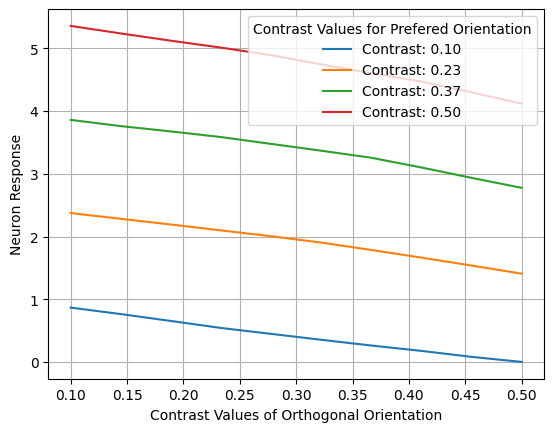

In [31]:
# Run without changing

contrasts_orth = np.linspace(0.1, 0.5, 10)
contrasts_pref_sweep = np.linspace(0.1, 0.5, 4)

for c in contrasts_pref_sweep:
    contrast_pref = np.linspace(c, c, 1)
    gratings = create_superimposed_gratings(frequency, radius, contrast_pref, contrasts_orth, pref_orientation, orth_orientation, size, center)

    network_layers = layers[0:NUM_LAYERS+1]
    network_outputs = network_layers(gratings)
    _=plt.plot(contrasts_orth, network_outputs[:, valid_neuron_indices[FILTER_NUMBER],id_x,id_y].detach().numpy(), label=f'Contrast: {c:.2f}')


plt.xlabel('Contrast Values of Orthogonal Orientation')
plt.ylabel('Neuron Response')

# Show the legend
plt.legend(title='Contrast Values for Prefered Orientation')
# Show the plot
plt.grid()
plt.show()

**Assignment 8** Similarly to Assignment 7, how does the response to an optimal orientation change when we add an orthogonal grating? 


<details>
<Summary>Answer</Summary>

Along the y-axis, we can keep the contrast of the orthogonal grating fixed and compare the neuron's response to the preferred grating with different contrasts (red for high contrast and blue for low contrast). Each line then shows a decrease, replicating the cross-orientation suppression experiment for different levels of contrast for the preferred grating. 
</details>

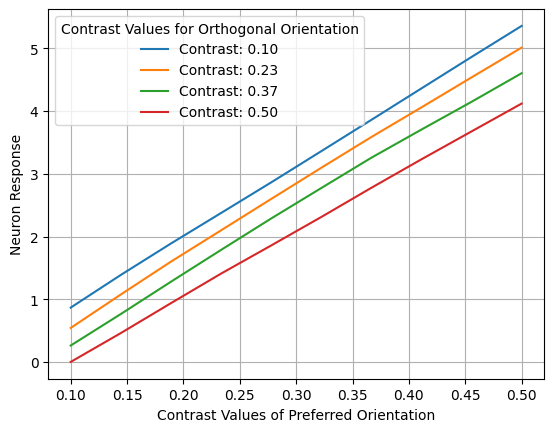

In [32]:
# Run without changing

contrasts_orth_sweep = np.linspace(0.1, 0.5, 4)
contrasts_pref = np.linspace(0.1, 0.5, 10)

for c in contrasts_orth_sweep:
    contrast_orth = np.linspace(c, c, 1)
    gratings = create_superimposed_gratings(frequency, radius, contrast_orth, contrasts_pref, orth_orientation, pref_orientation, size, center)

    network_layers = layers[0:NUM_LAYERS+1]
    network_outputs = network_layers(gratings)
    _=plt.plot(contrasts_pref, network_outputs[:, valid_neuron_indices[FILTER_NUMBER],id_x,id_y].detach().numpy(), label=f'Contrast: {c:.2f}')


plt.xlabel('Contrast Values of Preferred Orientation')
plt.ylabel('Neuron Response')

# Show the legend
plt.legend(title='Contrast Values for Orthogonal Orientation')
# Show the plot
plt.grid()
plt.show()

This experiment is the same as the one before, just now each line represents a different level of contrast for the orthogonal grating. This plot aims to replicate the effect mentioned in class in "Non-linear computations in V1", Slide 40 of Lecture 5.

## 6. Contrast saturation for optimal vs. sup-optimal orientation <a class="anchor" id="contrast_cnns_2"></a>

This effect was mentioned in class in "Non-linear computations in V1" - contrast saturation, Slide 40 of Lecture 5.

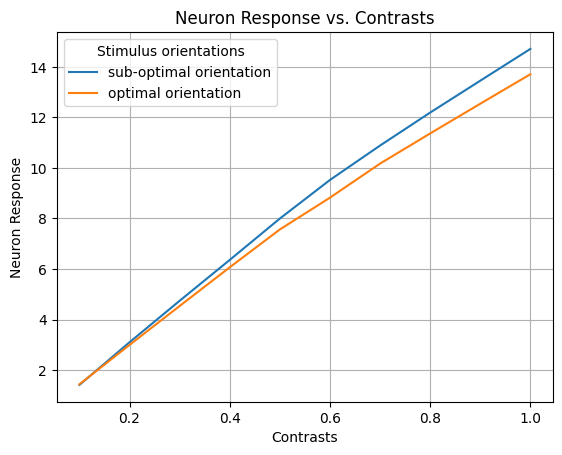

In [33]:
# Run without changing

pref_orientation, orth_orientation = get_pref_and_orth_angle(neuron_pref_orientation[valid_neuron_indices[FILTER_NUMBER]])

suboptimal_orientation = pref_orientation - 15

# Set parameters
size = (256, 256)
center_x = 125
center_y = 125 
frequency = 7.5
radius = 50

contrasts = np.linspace(0.1, 1, 10)


#generate different gratings with increasing contrasts
gratings = create_contrast_gratings(frequency, radius, contrasts, pref_orientation)
#select the layers of the network we want to pass the gratings through
network_layers = layers[0:NUM_LAYERS+1]
#pass the gratings through the layers we selected
#this matrix has the following shape: contrasts x number of filters x neuron response (2d)
network_outputs_optimal = network_layers(gratings).detach()


response_optimal = network_outputs_optimal[:, valid_neuron_indices[FILTER_NUMBER], id_x, id_y]
gratings = create_contrast_gratings(frequency, radius, contrasts, suboptimal_orientation)
#select the layers of the network we want to pass the gratings through
network_layers = layers[0:NUM_LAYERS+1]
#pass the gratings through the layers we selected
#this matrix has the following shape: contrasts x filters x neuron response (2d)
network_outputs_suboptimal = network_layers(gratings).detach()
response_suboptimal = network_outputs_suboptimal[:, valid_neuron_indices[FILTER_NUMBER],id_x,id_y]


_=plt.plot(contrasts, response_suboptimal.detach().numpy(), label='sub-optimal orientation')
_=plt.plot(contrasts, response_optimal.detach().numpy(), label='optimal orientation')

# Set the x-axis and y-axis labels
plt.xlabel('Contrasts')
plt.ylabel('Neuron Response')

# Optionally set a title
plt.title('Neuron Response vs. Contrasts')
plt.legend(title='Stimulus orientations')

# Show the plot
plt.grid()
plt.show()


## 7. Tuning to stimulus-size <a class="anchor" id="size_cnns_2"></a>

**Assignment 9** How does the response of a neuron change with stimulus size?


<details>
<Summary>Answer</Summary>

For some neurons the response first increases with stimulus size and then it decreases. This is a non-classical receptive field effect. This effect was mentioned in class in "Surround suppression in V1" slide 42 and "Multiple contributions to V1 responses" slide 43 in Lecture 5.

</details>

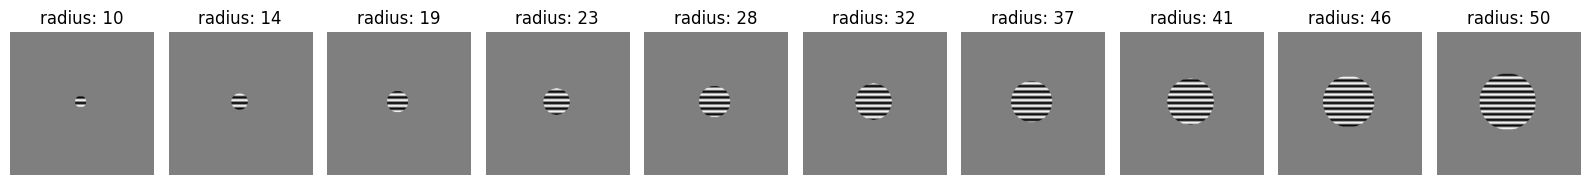

In [34]:
# Run without changing

# Set parameters
size = 256
center = (125, 125)

frequency = 10
contrast = 1
orientation = 0

radii = np.linspace(10, 50, 10)

gratings = create_radius_gratings(frequency, radii, contrast, orientation, size, center)
plot_image_row(gratings, titles=[f'radius: {r:.0f}' for r in radii])

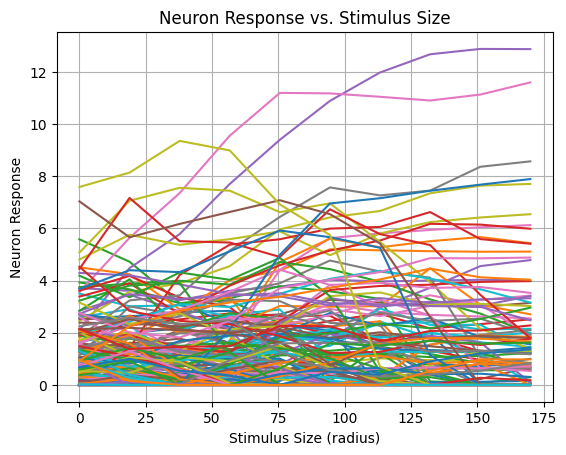

In [35]:
# Run without changing

network_layers = layers[0:NUM_LAYERS+1]
network_outputs = network_layers(gratings)

_=plt.plot(orientations, network_outputs[:, :, id_x, id_y].detach().numpy())

# Set the x-axis and y-axis labels
plt.xlabel('Stimulus Size (radius)')
plt.ylabel('Neuron Response')

# Optionally set a title
plt.title('Neuron Response vs. Stimulus Size')

# Show the plot
plt.grid()
plt.show()

Now that we have run all these experiments on one layer (NUM_LAYERS = 1), go back to where this variable is set and see how the results change as you go deeper into the network.

## Part II. Rao and Ballard model of predictive coding in V1 <a class="anchor" id="rao_ballard"></a>

This experiment was mentioned in class in "Predictive Coding", Slide 48 in Lecture 5.

[Rajesh P. N. Rao & Dana H. Ballard Nature 1999 - Predictive coding in the visual cortex: a functional interpretation of some extra-classical receptive-field effects.](https://www.nature.com/articles/nn0199_79)


In [ ]:
# Run without changing

#load the trained rao and ballard model
model = load_rao_ballard()

In [ ]:
# Run without changing

# Set parameters
frequency = 3
orientation = 90
radius = 6


#generate different gratings with increasing contrasts
contrasts = np.linspace(0.1, 1, 10)
gratings = create_contrast_gratings(frequency, radius, contrasts, orientation, size=16, center=(8, 8))
plot_image_row(gratings, titles=[f'c: {c:.2f}' for c in contrasts])

In [31]:
# Run without changing

model.initialize_states(gratings[0].reshape(3, 256).numpy())

layer_1_activities_per_contrast = np.zeros((len(gratings), 32))
layer_2_activities_per_contrast = np.zeros((len(gratings), 128))

for i, g in enumerate(gratings):
    #the model is expecting a flattened representation of the image
    er1, er2, l1, l2 = model(g.reshape(3, 256).numpy())
    layer_1_activities_per_contrast[i] = abs(l1).mean(0)
    layer_2_activities_per_contrast[i] = abs(l2)

## 1. Contrast saturation <a class="anchor" id="contrast_rao"></a>


**Assignment 10** Do neurons in layer 1 and layer 2 show contrast saturation?


<details>
<Summary>Answer</Summary>

Neurons in layer 1 show contrast saturation while neurons in layer 2 are contrast-invariant (scale is very small). Contrast-saturation was mentioned in class in "Non-linear computations in V1", Slide 40 of Lecture 5.  
</details>

In [ ]:
# you can change layer_1_activities_per_contrast to layer_2_activities_per_contrast to see how layer 2 neurons change their response with contrast.

_=plt.plot(contrasts, layer_1_activities_per_contrast)
plt.xlabel('Contrast Values')
plt.ylabel('Neuron response')


## 2. Cross-orientation suppression <a class="anchor" id="inhibtion_rao"></a>

We will repeat this experiment similarly to the one in section (5) of Alexnet. First we determine for each neuron its preferred orientation. Then we select a neuron and we create a super-imposed grating consisting of its preferred grating and its orthogonal grating.

In [ ]:
# Run without changing

# Set parameters
frequency = 3
radius = 6
contrast = 1

orientations = np.linspace(0, 170, 10)

gratings = create_orientation_gratings(frequency, radius, contrast, orientations, size=16, center=(8, 8))
plot_image_row(gratings, titles=[f'orientation: {o:.0f}' for o in orientations])

In [38]:
# Run without changing

model.initialize_states(gratings[0].reshape(3, 256).numpy())

layer_1_activities_per_orientation = np.zeros((len(gratings), 32))
layer_2_activities_per_orientation = np.zeros((len(gratings), 128))

for i, g in enumerate(gratings):
    #the model is expecting a flattened representation of the image
    er1, er2, l1, l2 = model(g.reshape(3, 256).numpy())
    layer_1_activities_per_orientation[i] = abs(l1).mean(0)
    layer_2_activities_per_orientation[i] = abs(l2)

In [ ]:
# Run without changing

_=plt.plot(orientations, layer_1_activities_per_orientation)
plt.xlabel('orientations')
plt.ylabel('average activity')

In [ ]:
# Run without changing

m = layer_1_activities_per_orientation
print('Number of Stimuli Orientations x Number of Neurons: ', m.shape) # Number of Stimuli Orientations x Number of Neurons
max_indices = np.argmax(m, axis=0) # we take the maximum across rows, i.e. for each neuron we look which stimuli elicited the highest response
neuron_pref_orientation = orientations[max_indices]
print('Number of Neurons: ', neuron_pref_orientation.shape)

In [ ]:
# Run without changing

variances = np.var(m, axis=0)

# Plot the histogram of the variances
plt.hist(variances, bins=20, edgecolor='black')
plt.title('Histogram of Variances')
plt.xlabel('Variance across Orientations')
plt.ylabel('Frequency')
plt.grid()
plt.show()


In [ ]:
#Here we select an *arbitrary* threshold to focus only on the most tuned units

variance_threshold = np.median(variances)
valid_neurons = variances > variance_threshold # we select an *arbitrary* threshold to focus only on the most tuned units

valid_neuron_indices = np.nonzero(valid_neurons)[0]

print('A list of tuned units: ', valid_neuron_indices)

In [ ]:
# Run without changing

neuron_index = 0
pref_orientation, orth_orientation = get_pref_and_orth_angle(neuron_pref_orientation[valid_neuron_indices[neuron_index]])
print(f'Prefered orientation is {pref_orientation:.0f} and orth orientation is {orth_orientation:.0f}')

frequency = 3
radius = 6
c = 0.5

contrasts_orth = np.linspace(0.1, 0.5, 10)
contrast_pref = np.linspace(c, c, 1)
gratings = create_superimposed_gratings(frequency, radius, contrast_pref, contrasts_orth, pref_orientation, orth_orientation, size=16, center=(8, 8))
plot_image_row(gratings, titles=[f'contrast: {ctr:.2f}' for ctr in contrasts_orth])

In [ ]:
# Run without changing

neuron_index = 0
pref_orientation, orth_orientation = get_pref_and_orth_angle(neuron_pref_orientation[valid_neuron_indices[neuron_index]])

print(f'Prefered orientation is {pref_orientation:.0f} and orth orientation is {orth_orientation:.0f}')

contrasts_orth = np.linspace(0.1, 0.5, 10)
contrasts_pref_sweep = np.linspace(0.1, 0.5, 4)

for c in contrasts_pref_sweep:
    contrast_pref = np.linspace(c, c, 1)
    gratings = create_superimposed_gratings(frequency, radius, contrast_pref, contrasts_orth, pref_orientation, orth_orientation, size=16, center=(8, 8))

    model.initialize_states(gratings[0].reshape(3, 256).numpy())


    layer_1_activities_per_orientation = np.zeros((len(gratings), 32))
    layer_2_activities_per_orientation = np.zeros((len(gratings), 128))

    for i, g in enumerate(gratings):
        #the model is expecting a flattened representation of the image
        er1, er2, l1, l2 = model(g.reshape(3, 256).numpy())
        layer_1_activities_per_orientation[i] = abs(l1).mean(0)
        layer_2_activities_per_orientation[i] = abs(l2)

    m = layer_1_activities_per_orientation[:, [valid_neuron_indices[neuron_index]]]

    _=plt.plot(contrasts_orth, m, label=f'Contrast: {c:.2f}')

plt.xlabel('Contrast Values of Orthogonal Orientation')
plt.ylabel('Neuron Response')
plt.legend(title='Contrast of preferred grating')


plt.grid()
plt.show()

**Assignment 11** Do neurons in layer 1 show cross-orientation suppression?


<details>
<Summary>Answer</Summary>

Cross-orientation suppression was mentioned in class in "Non-linear computations in V1", Slide 40 of Lecture 5. This model also shows cross-orientation suppression effects for neurons in Layer 1(the response decreases as we add an orthogonal grating).

</details>

## 3. End-inhibiton <a class="anchor" id="end_inh_rao"></a>

This effect was mentioned in class in "Predictive coding explains tuning for stimulus size" slide 50 of Lecture 5.


In [ ]:
# Run without changing

# Set parameters
size = 16
center = (8,8)
contrast = 2
width = 1

lengths = np.linspace(1, 16, 10)

bars = create_bar_lengths(size, contrast, center, lengths, width)
plot_image_row(bars, titles=[f'lengths: {l:.0f}' for l in lengths])

In [48]:
# Run without changing

model.initialize_states(bars[0].reshape(3, 256).numpy())

layer_1_activities_per_contrast = np.zeros((len(bars), 32))
layer_2_activities_per_contrast = np.zeros((len(bars), 128))

for i, g in enumerate(bars):
    #the model is expecting a flattened representation of the image
    er1, er2, l1, l2 = model(g.reshape(3, 256).numpy())
    layer_1_activities_per_contrast[i] = abs(l1).mean(0)
    layer_2_activities_per_contrast[i] = abs(l2)

In [ ]:
# Run without changing

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot for layer 1 neurons
ax1.plot(lengths, layer_1_activities_per_contrast)
ax1.set_xlabel('Bar Lengths')
ax1.set_ylabel('Average Activity')
ax1.set_title('Mean response for Layer 1 neurons')

# Plot for layer 2 neurons
ax2.plot(lengths, layer_2_activities_per_contrast)
ax2.set_xlabel('Bar Lengths')
ax2.set_ylabel('Average Activity')
ax2.set_title('Mean response for Layer 2 neurons')

# Display the plots side by side
plt.tight_layout()  # Adjust spacing to prevent overlap
plt.show()


**Assignment 12** How does the response of a neuron change with stimulus size?


<details>
<Summary>Answer</Summary>

For neurons in Layer 1 the response first increases with stimulus size and then it decreases. This is a non-classical receptive field effect. This effect was mentioned in class in "Surround suppression in V1" slide 42, "Multiple contributions to V1 responses" slide 43 and "Predictive coding explains tuning for stimulus size" slide 50 of Lecture 5. Why is this effect seen only in Layer 1 and not also in Layer 2?

</details>